<div>
<img src="data\data_Vergelijking methodes\Constructie.gif" width="500"/>
</div>

In [1]:
import sympy as sp

## Krachten ##

### Differentiaalvergelijking ###
$$q(x)= Am{\left\langle x \right\rangle ^{ - 2}} + Av{\left\langle x \right\rangle ^{ - 1}} + Bv{\left\langle {x - 6} \right\rangle ^{ - 1}} + F{\left\langle {x - 2.5} \right\rangle ^{ - 1}} + {q_0}$$
$$\eqalign{
  & V\left( x \right) =  - \int {q\left( x \right)dx}   \cr 
  & M\left( x \right) = \int {V\left( x \right)dx}   \cr 
  & M\left( 6 \right) = 0  \cr 
  & M\left( {2.5} \right) = 0 \cr} $$

In [2]:
x, q0, F= sp.symbols('x, q0, F')
q = q0 + sp.SingularityFunction(x,2.5,-1)*F

C1, C2 = sp.symbols('C1, C2')
V = -sp.integrate(q,x) + C1
M = sp.integrate(V,x) + C2
eq1 = sp.Eq(M.subs(x,6),0)
eq2 = sp.Eq(M.subs(x,2.5),0)
display(eq1)
display(eq2)
sol = sp.solve((eq1,eq2),(C1,C2))
display(sol)
M_sol = M.subs(sol)
M_subs = M_sol.subs(((F,50),(q0,5)))
A_m_1 = M_subs.subs(x,0)
display(A_m_1)

Eq(6*C1 + C2 - 3.5*F - 18*q0, 0)

Eq(2.5*C1 + C2 - 3.125*q0, 0)

{C1: F + 4.25*q0, C2: -2.5*F - 7.5*q0}

-162.500000000000

### Evenwichtsvergelijkingen ###
<div>
<img src="data\data_Vergelijking methodes\Oplegreacties.gif" width="500"/>
</div>
$$\sum M_C : - Am - 2.5 Av - 3.125 q_{0} = 0 $$
$$\sum F_v : - Av - Bv - F - 6 q_{0} = 0 $$
$$\sum M_B : - Am - 6 Av - 3.5 F - 18 q_{0} = 0$$

In [3]:
Am, Av, Bv= sp.symbols('Am Av Bv')
q = sp.SingularityFunction(x,0,-2)*Am + sp.SingularityFunction(x,0,-1)*Av + q0 + sp.SingularityFunction(x,2.5,-1)*F + sp.SingularityFunction(x,6,-1)*Bv
display(q)

V = -sp.integrate(q,x)
M = sp.integrate(V,x)
eq3 = sp.Eq(M.subs(x,2.5),0)
eq4 = sp.Eq(V.subs(x,6),0)
eq5 = sp.Eq(M.subs(x,6),0)
display(eq3)
display(eq4)
display(eq5)
sol2 = sp.solve((eq3,eq4,eq5),(Am,Av,Bv))
display(sol2)
A_m_2 = sol2[Am].subs(((F,50),(q0,5)))
display(A_m_2)

Am*SingularityFunction(x, 0, -2) + Av*SingularityFunction(x, 0, -1) + Bv*SingularityFunction(x, 6, -1) + F*SingularityFunction(x, 2.5, -1) + q0

Eq(-Am - 2.5*Av - 3.125*q0, 0)

Eq(-Av - Bv - F - 6*q0, 0)

Eq(-Am - 6*Av - 3.5*F - 18*q0, 0)

{Am: 2.5*F + 7.5*q0, Av: -F - 4.25*q0, Bv: -1.75*q0}

162.500000000000

### Virtuele arbeidmethode / virtuele verplaatsingenmethode ###
<div>
<img src="data\data_Vergelijking methodes\Virtuele arbeid.gif" width="500"/>
</div>
$$\delta A = 0 : \frac{A_m\delta u}{2.5} = 50\delta u+5\cdot2.5\cdot\frac{1}{2}\delta u+5\cdot3.5\cdot \frac{1}{2}\delta u$$

In [4]:
A_m_3 = 2.5*(50+5*2.5*0.5+5*3.5*0.5)
display(A_m_3)

162.5

## Verplaatsingen ##

In [5]:
M_sol = M.subs(sol2)
M_subs = M_sol.subs(((F,50),(q0,5)))
M_sol_piecewise = sp.simplify(M_sol.rewrite(sp.Piecewise))
display(M_sol_piecewise)
M_subs_piecewise = sp.simplify(M_subs.rewrite(sp.Piecewise))
display(M_subs_piecewise)

Piecewise((q0*(-0.5*x**2 + 6.0*x - 18.0), x > 6), (q0*(-0.5*x**2 + 4.25*x - 7.5), x > 2.5), (-2.5*F - q0*x**2/2 - 7.5*q0 + x*(F + 4.25*q0), x > 0), (-q0*x**2/2, True))

Piecewise((-2.5*x**2 + 30.0*x - 90.0, x > 6), (-2.5*x**2 + 21.25*x - 37.5, x > 2.5), (-2.5*x**2 + 71.25*x - 162.5, x > 0), (-5*x**2/2, True))

### Differentiaalvergelijking ###

$$\eqalign{
  & M\left( x \right) = \left\{ {\matrix{
   {{q_0}\left( { - 0.5{x^2} + 4.25x - 7.5} \right)} & {{\rm{for}}\>x > 2.5}  \cr 
   { - 2.5F - {{{q_0}{x^2}} \over 2} - 7.5{q_0} + x\left( {F + 4.25{q_0}} \right)} & {{\rm{for}}\>x > 0}  \cr  } } \right.  \cr 
  & \kappa  = {M \over {EI}}  \cr 
  & \varphi  = \int {\kappa dx}  + {C_4}{\left\langle {x - 2.5} \right\rangle ^0}  \cr 
  & w =  - \int {\varphi dx}   \cr 
  & w\left( 0 \right) = 0  \cr 
  & \varphi \left( 0 \right) = 0  \cr 
  & w\left( 6 \right) = 6 \cr} $$

In [6]:
C3,C4,C5 = sp.symbols('C3, C4, C5')
kappa = M_sol / 2e4
phi = sp.integrate(kappa,x)+C3 + C4 * sp.SingularityFunction(x,2.5,0)
w = -sp.integrate(phi,x)+C5
eq6 = sp.Eq(phi.subs(x,0),0)
eq7 = sp.Eq(w.subs(x,0),0)
eq8 = sp.Eq(w.subs(x,6),0)
display(eq6)
display(eq7)
display(eq8)
sol3 = sp.solve((eq6,eq7,eq8),(C3,C4,C5))
display(sol3)
w_sol = w.subs(sol3)
w_subs = w_sol.subs(((F,50),(q0,5)))
w_subs_piecewise = sp.simplify(w_subs.rewrite(sp.Piecewise))
w_C_1 = w_subs.subs(x,2.5)
display(w_C_1)

Eq(C3, 0)

Eq(C5, 0)

Eq(-6*C3 - 3.5*C4 + C5 + 0.000807291666666667*F + 0.0018*q0, 0)

{C3: 0.0, C4: 0.000230654761904762*F + 0.000514285714285714*q0, C5: 0.0}

0.0165201822916667

### Virtuele krachtenmethode ###
$$M\left( x \right) = \left\{ {\matrix{
   {{q_0}\left( { - 0.5{x^2} + 4.25x - 7.5} \right)} & {{\rm{for}}\>x > 2.5}  \cr 
   { - 2.5F - {{{q_0}{x^2}} \over 2} - 7.5{q_0} + x\left( {F + 4.25{q_0}} \right)} & {{\rm{for}}\>x > 0}  \cr  } } \right.$$
   
   
$$m(x):$$
<div>
<img src="data\data_Vergelijking methodes\Virtuele kracht.gif" width="500"/>
</div>

$$\eqalign{
  & m\left( x \right) = \left\{ {\matrix{
   0 \hfill & {{\rm{for}}\>x > 2.5} \hfill  \cr 
   {x - 2.5} \hfill & {{\rm{for}}\>x > 0} \hfill  \cr 
   0 \hfill & {{\rm{otherwise}}} \hfill  \cr  } } \right.  \cr 
  & w_C = \int_0^{2.5} {{{\left( {x - 2.5} \right)\left( { - 2.5{x^2} + 71.25x - 162.5} \right)} \over {2 \cdot {{10}^4}}}} dx \cr}$$

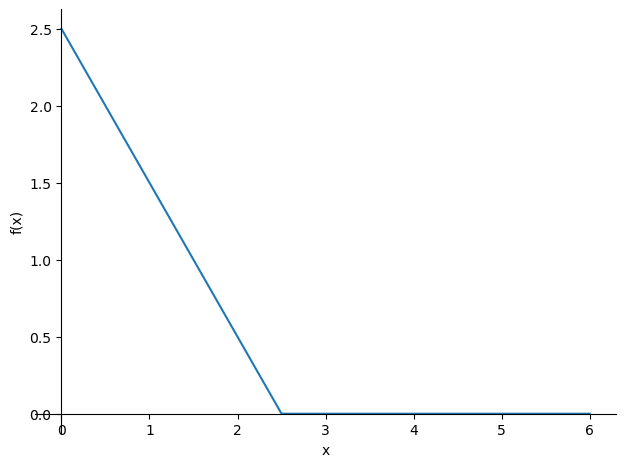

Piecewise((0, x > 2.5), (deltaF*(x - 2.5), x > 0), (0, True))

Piecewise((0, x > 2.5), (x - 2.5, x > 0), (0, True))

In [7]:
deltaF = sp.symbols('deltaF')
deltaq = sp.SingularityFunction(x,0,-2)*Am + sp.SingularityFunction(x,0,-1)*Av + sp.SingularityFunction(x,2.5,-1)*deltaF + sp.SingularityFunction(x,6,-1)*Bv
deltaV = -sp.integrate(deltaq,x)
deltaM = sp.integrate(deltaV,x)
eq9 = sp.Eq(deltaM.subs(x,2.5),0)
eq10 = sp.Eq(deltaV.subs(x,6),0)
eq11 = sp.Eq(deltaM.subs(x,6),0)
deltasol = sp.solve((eq9,eq10,eq11),(Am,Av,Bv))
deltaM_sol = deltaM.subs(deltasol)
deltaM_subs = deltaM_sol.subs(deltaF,1)
sp.plot(-deltaM_subs,(x,0,6))
deltaM_sol_piecewise = sp.simplify(deltaM_sol.rewrite(sp.Piecewise))
display(deltaM_sol_piecewise)
deltaM_subs_piecewise = sp.simplify(deltaM_subs.rewrite(sp.Piecewise))
display(deltaM_subs_piecewise)

In [8]:
w_C_2 = sp.integrate(deltaM_subs_piecewise.args[1][0]*M_subs_piecewise.args[2][0],(x,0,2.5)) / 2e4
display(w_C_2)

0.0165201822916667

### Castigliano ### 


$$\eqalign{
  & M\left( x \right) = \left\{ {\matrix{
   {{q_0}\left( { - 0.5{x^2} + 4.25x - 7.5} \right)} & {{\rm{for}}\>x > 2.5}  \cr 
   { - 2.5F - {{{q_0}{x^2}} \over 2} - 7.5{q_0} + x\left( {F + 4.25{q_0}} \right)} & {{\rm{for}}\>x > 0}  \cr  } } \right.  \cr 
  & {{M\left( x \right)} \over {dF}} = \left\{ {\matrix{
   0 & {{\rm{for}}\>x > 2.5}  \cr 
   {x - 2.5} & {{\rm{for}}\>x > 0}  \cr  } } \right.  \cr 
  & {w_C} = \int_0^{2.5} {{{M\left( x \right)} \over {2 \cdot {{10}^4}}}{{M\left( x \right)} \over {dF}}} dx \cr} $$

In [9]:
w_C_3 = sp.integrate(M_sol_piecewise.args[2][0]*M_sol_piecewise.args[2][0].diff(F),(x,0,2.5))/2e4
display(w_C_3.subs(((F,50),(q0,5))))

0.0165201822916667

### Potentiële energie ###

$$\eqalign{
  & {w_1} = {a_1}{x^4} + {a_2}{x^3} + {a_3}{x^2} + {a_4}x + {a_5} & {\rm{for 0}} \le x \le 2.5  \cr 
  & {w_2} = {b_1}{x^4} + {b_2}{x^3} + {b_3}{x^2} + {b_4}x + {b_5} & {\rm{for 2}}{\rm{.5}} \le x \le 6  \cr 
  & \left. \matrix{
  {w_1}\left( 0 \right) = 0 \hfill \cr 
  {\varphi _1}\left( 0 \right) = 0 \hfill \cr 
  {w_1}\left( {2.5} \right) = {w_2}\left( {2.5} \right) \hfill \cr 
  {w_2}\left( 6 \right) = 0 \hfill \cr}  \right\} \to {a_4},{a_5},{b_4},{b_5}  \cr 
  & \kappa  =  - {{{d^2}w} \over {d{x^2}}}  \cr 
  & V = \int_0^6 {{{EI{\kappa ^2}} \over 2}} dx - 50 \cdot w\left( {2.5} \right) - \int_0^6 {q \cdot w\left( x \right)} dx  \cr 
  & \left. \matrix{
  {{\partial V} \over {\partial {a_1}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {a_2}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {a_3}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {b_1}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {b_2}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {b_3}}} = 0 \hfill \cr}  \right\} \to {a_1},{a_2},{a_3},{b_1},{b_2},{b_3} \cr} $$

In [10]:
a1, a2, a3, a4, a5, b1, b2, b3, b4, b5, x = sp.symbols('a1 a2 a3 a4 a5 b1 b2 b3 b4 b5 x')
w1 = a1 * x **4 + a2 * x **3 + a3 * x **2 + a4 * x + a5
w2 = b1 * x **4 + b2 * x **3 + b3 * x **2 + b4 * x + b5
phi1 = -w1.diff(x)
phi2 = -w2.diff(x)
eq1 = sp.Eq(w1.subs(x,0),0)
eq2 = sp.Eq(phi1.subs(x,0),0)
eq3 = sp.Eq(w1.subs(x,2.5),w2.subs(x,2.5))
eq4 = sp.Eq(w2.subs(x,6),0)
sol = sp.solve((eq1,eq2,eq3,eq4),(a4,a5,b4,b5))
display(sol)
w1 = w1.subs(sol)
w2 = w2.subs(sol)

V = 2e4/2*(sp.integrate((-w1.diff(x,2))**2,(x,0,2.5))+sp.integrate((-w2.diff(x,2))**2,(x,2.5,6)) ) - 50 * w1.subs(x,2.5) - sp.integrate(5 * w1,(x,0,2.5))- sp.integrate(5 * w2,(x,2.5,6))
display(V)

eq5 = sp.Eq(V.diff(a1) ,0)
eq6 = sp.Eq(V.diff(a2) ,0)
eq7 = sp.Eq(V.diff(a3) ,0)
eq8 = sp.Eq(V.diff(b1) ,0)
eq9 = sp.Eq(V.diff(b2) ,0)
eq10 = sp.Eq(V.diff(b3) ,0)

sol = sp.solve((eq5,eq6,eq7,eq8,eq9,eq10),(a1,a2,a3,b1,b2,b3))
display(sol)

w1_sol=w1.subs(sol)
w2_sol=w2.subs(sol)
display(w1_sol.subs(x,2.5))

{a4: 0.0,
 a5: 0.0,
 b4: -11.1607142857143*a1 - 4.46428571428571*a2 - 1.78571428571429*a3 - 359.125*b1 - 57.25*b2 - 8.5*b3,
 b5: 66.9642857142857*a1 + 26.7857142857143*a2 + 10.7142857142857*a3 + 858.75*b1 + 127.5*b2 + 15.0*b3}

28125000.0*a1**2 + 14062500.0*a1*a2 + 2500000.0*a1*a3 - 2392.578125*a1 + 1875000.0*a2**2 + 750000.0*a2*a3 - 966.796875*a2 + 100000.0*a3**2 - 393.229166666667*a3 + 2211363000.0*b1**2 + 452497500.0*b1*b2 + 32060000.0*b1*b3 + 4003.453125*b1 + 24045000.0*b2**2 + 3570000.0*b2*b3 + 455.546875*b2 + 140000.0*b3**2 + 35.7291666666667*b3

{a1: 1.04166666666680e-5,
 a2: -0.000593750000000008,
 a3: 0.00406250000000001,
 b1: 1.04166666666667e-5,
 b2: -0.000177083333333333,
 b3: 0.000937500000000000}

0.0165201822916667